<a href="https://colab.research.google.com/github/Aicoaching2025/Advanced-Logistic-Regression/blob/main/Advanced_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Class distribution:
target
0    900
1    100
Name: count, dtype: int64
Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       271
           1       0.88      1.00      0.94        29

    accuracy                           0.99       300
   macro avg       0.94      0.99      0.96       300
weighted avg       0.99      0.99      0.99       300



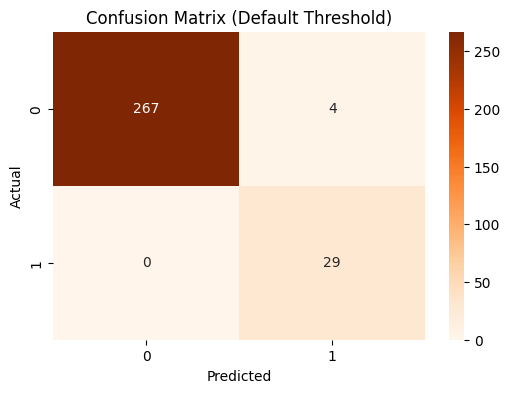

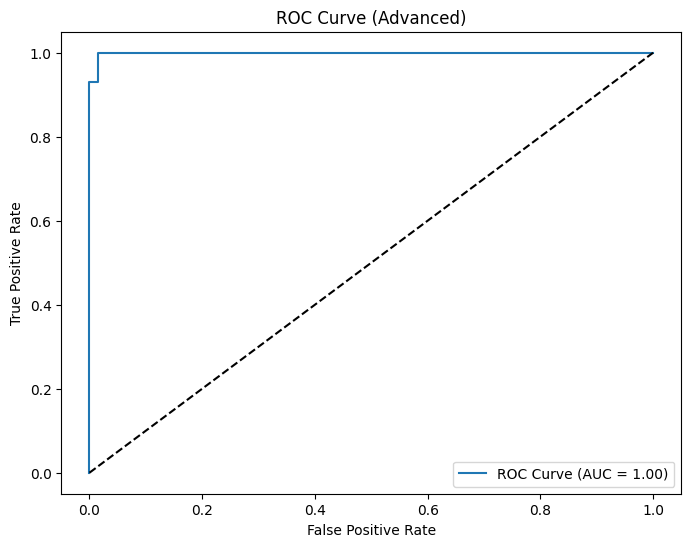

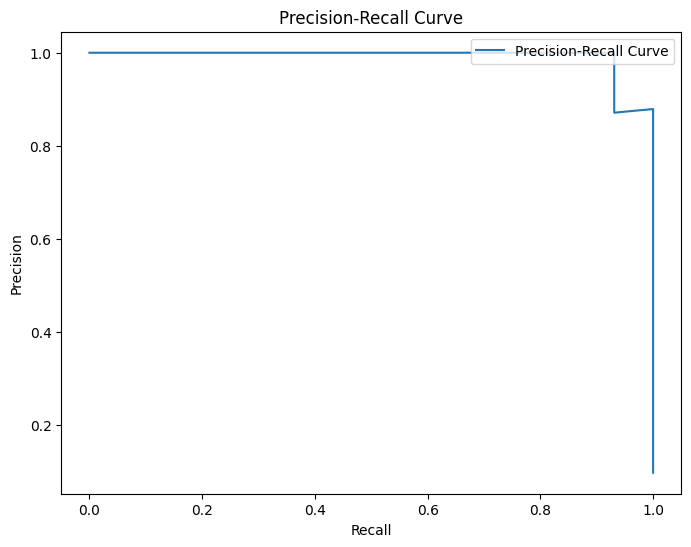

Classification Report (Custom Threshold = 0.3):
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       271
           1       0.69      1.00      0.82        29

    accuracy                           0.96       300
   macro avg       0.85      0.98      0.90       300
weighted avg       0.97      0.96      0.96       300



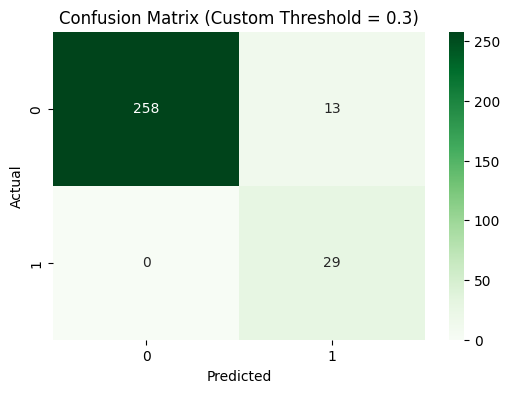

     Feature  Coefficient
0  feature_0    -4.570005
1  feature_1     0.654519
2  feature_2    -0.126588
3  feature_3     1.043997
4  feature_4    -0.703549
5  feature_5    -0.264979
6  feature_6    -0.211067
7  feature_7     0.476386
8  feature_8    -0.170195
9  feature_9     3.154504


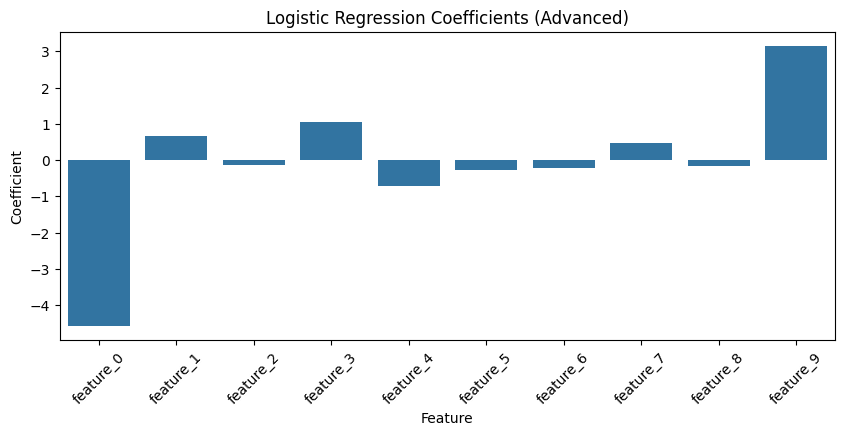

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn imports for generating imbalanced data and modeling
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, precision_recall_curve

# -----------------------------------------
# Step 1: Generate Imbalanced Synthetic Data
# -----------------------------------------
# Using make_classification to simulate an imbalanced dataset (e.g., 90% low risk, 10% high risk)
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2,
                           n_clusters_per_class=1, weights=[0.9, 0.1], flip_y=0, random_state=42)

# Create a DataFrame for better readability
feature_names = [f"feature_{i}" for i in range(10)]
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Check class distribution
print("Class distribution:")
print(df['target'].value_counts())

# -----------------------------------------
# Step 2: Split Data & Train Logistic Regression with Class Weighting
# -----------------------------------------
X_train, X_test, y_train, y_test = train_test_split(df[feature_names], df['target'], test_size=0.3, random_state=42)

# Create a logistic regression model that addresses class imbalance
model = LogisticRegression(solver='liblinear', class_weight='balanced')
model.fit(X_train, y_train)

# Generate predictions and probabilities
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate model performance with default threshold
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix (Default Threshold)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------------------
# Step 3: ROC and Precision-Recall Analysis
# -----------------------------------------
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve (Advanced)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper right")
plt.show()

# -----------------------------------------
# Step 4: Adjust Prediction Threshold and Re-evaluate
# -----------------------------------------
# Default prediction threshold is 0.5. Adjust the threshold to see effects on sensitivity/specificity.
custom_threshold = 0.3  # Example: lower threshold for higher sensitivity
y_pred_custom = (y_pred_prob >= custom_threshold).astype(int)

print("Classification Report (Custom Threshold = {}):".format(custom_threshold))
print(classification_report(y_test, y_pred_custom))

cm_custom = confusion_matrix(y_test, y_pred_custom)
plt.figure(figsize=(6,4))
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (Custom Threshold = {})".format(custom_threshold))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------------------
# Step 5: Coefficient Analysis & Model Assumptions
# -----------------------------------------
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_[0]
})
print(coeff_df)

plt.figure(figsize=(10, 4))
sns.barplot(x='Feature', y='Coefficient', data=coeff_df)
plt.title("Logistic Regression Coefficients (Advanced)")
plt.xticks(rotation=45)
plt.show()
